In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# Importing Training and Testing Dataset 
data_train=pd.read_csv('6. WALMART STORE PREDICTION - FORECASTING//6. WALMART STORE PREDICTION - FORECASTING//trainMerged.csv')
data_test=pd.read_csv('6. WALMART STORE PREDICTION - FORECASTING//6. WALMART STORE PREDICTION - FORECASTING//testMerged.csv')

In [4]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(y):
    return pd.Series([y.count(), y.isnull().sum(), y.sum(), y.mean(), y.median(),  y.std(), y.var(), y.min(), y.dropna().quantile(0.01), y.dropna().quantile(0.05),y.dropna().quantile(0.10),y.dropna().quantile(0.25),y.dropna().quantile(0.50),y.dropna().quantile(0.75), y.dropna().quantile(0.90),y.dropna().quantile(0.95), y.dropna().quantile(0.99),y.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

def summary(x):
    num_var=[key for key in dict(x.dtypes) if dict(x.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
    y=x[num_var]
    summary=y.apply(lambda z: var_summary(z)).T
    return summary

In [5]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [6]:
def list_delete(list1,list2):
    list3=list1.copy()
    for var in list2:
        list3.remove(var) 
    return list3

In [7]:
def datedata(df,col):
    df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df['day'] = df[col].dt.day
    df.rename(columns={'year':col+'_year','month':col+'_month','day':col+'_day'},inplace=True)
    df.drop(col,axis=1,inplace=True)
    return df

In [8]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [9]:
data_train.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,10,2010-02-05,False,1,40212.84,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
1,10,2010-02-05,False,98,74.00,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
2,10,2010-02-05,False,32,26116.73,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
3,10,2010-02-05,False,25,20779.50,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
4,10,2010-02-05,False,34,50585.42,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765


In [10]:
data_test.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,10,2012-11-02,False,1,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943
1,10,2012-11-02,False,72,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943
2,10,2012-11-02,False,71,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943
3,10,2012-11-02,False,21,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943
4,10,2012-11-02,False,67,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null object
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Dept            115064 non-null int64
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


In [13]:
# Adding a column 'train/test' so that columns of training and testing data because data is reindexed at some pionts so it could create issueat later stage 
# Adding 1,2,3 with 'train' or 'test' to know original indexing 
data_train['train/test']='train'
data_train['train/test']=data_train['train/test'].map(str)+data_train.index.map(str)
data_test['train/test']='test'
data_test['train/test']=data_test['train/test'].map(str)+data_test.index.map(str)

# Creating a copy of data_train DataFrame and removing 'Weekly_Sales' to make both train and test Dataframe same 
data_train_copy=data_train.copy()
data_train_copy.drop('Weekly_Sales',axis=1,inplace=True)

# Concatenating Training and Testing DataFrame into one to make transformation on whole Dataframe to predict values of markdown First  
data=pd.concat([data_train_copy,data_test],axis=0)
data.reset_index(inplace=True,drop=True)

In [14]:
data_train.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,train/test
0,10,2010-02-05,False,1,40212.84,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,train0
1,10,2010-02-05,False,98,74.00,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,train1
2,10,2010-02-05,False,32,26116.73,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,train2
3,10,2010-02-05,False,25,20779.50,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,train3
4,10,2010-02-05,False,34,50585.42,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,train4


In [15]:
data_test.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,train/test
0,10,2012-11-02,False,1,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,test0
1,10,2012-11-02,False,72,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,test1
2,10,2012-11-02,False,71,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,test2
3,10,2012-11-02,False,21,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,test3
4,10,2012-11-02,False,67,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,test4


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 16 columns):
Store           536634 non-null int64
Date            536634 non-null object
IsHoliday       536634 non-null bool
Dept            536634 non-null int64
Type            536634 non-null object
Size            536634 non-null int64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
CPI             498472 non-null float64
Unemployment    498472 non-null float64
train/test      536634 non-null object
dtypes: bool(1), float64(9), int64(3), object(3)
memory usage: 61.9+ MB


### Our First Task is to predict values of Markdown  So creating Seaparate Models for Each MarkDown

In [17]:
## Adding all the column to the list 
var_m=[]
for var in data.columns:
    var_m.append(var)
var_m

['Store',
 'Date',
 'IsHoliday',
 'Dept',
 'Type',
 'Size',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'train/test']

In [18]:
## Adding other markdown variables to list to delete them from the list of all variables 
m1=['MarkDown2','MarkDown3','MarkDown4','MarkDown5']
m2=['MarkDown1','MarkDown3','MarkDown4','MarkDown5']
m3=['MarkDown1','MarkDown2','MarkDown4','MarkDown5']
m4=['MarkDown1','MarkDown2','MarkDown3','MarkDown5']
m5=['MarkDown1','MarkDown2','MarkDown3','MarkDown4']

In [19]:
## Delete other Markdown values from the list of variables 
var_m1=list_delete(var_m,m1)
print(var_m1)
var_m2=list_delete(var_m,m2)
print(var_m2)
var_m3=list_delete(var_m,m3)
print(var_m3)
var_m4=list_delete(var_m,m4)
print(var_m4)
var_m5=list_delete(var_m,m5)
print(var_m5)

['Store', 'Date', 'IsHoliday', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'CPI', 'Unemployment', 'train/test']
['Store', 'Date', 'IsHoliday', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown2', 'CPI', 'Unemployment', 'train/test']
['Store', 'Date', 'IsHoliday', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown3', 'CPI', 'Unemployment', 'train/test']
['Store', 'Date', 'IsHoliday', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown4', 'CPI', 'Unemployment', 'train/test']
['Store', 'Date', 'IsHoliday', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown5', 'CPI', 'Unemployment', 'train/test']


In [20]:
## Creating a DataFrame with only non null Values of Markdown 1 and all other variables 
data_m1=data[var_m1]
## Creating a DataFrame with only non null Values of Markdown 2 and all other variables 
data_m2=data[var_m2]
## Creating a DataFrame with only non null Values of Markdown 3 and all other variables 
data_m3=data[var_m3]
## Creating a DataFrame with only non null Values of Markdown 4 and all other variables 
data_m4=data[var_m4]
## Creating a DataFrame with only non null Values of Markdown 5 and all other variables 
data_m5=data[var_m5]

In [21]:
data_m1.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,CPI,Unemployment,train/test
0,10,2010-02-05,False,1,B,126512,54.34,2.962,NaN,126.442065,9.765,train0
1,10,2010-02-05,False,98,B,126512,54.34,2.962,NaN,126.442065,9.765,train1
2,10,2010-02-05,False,32,B,126512,54.34,2.962,NaN,126.442065,9.765,train2
3,10,2010-02-05,False,25,B,126512,54.34,2.962,NaN,126.442065,9.765,train3
4,10,2010-02-05,False,34,B,126512,54.34,2.962,NaN,126.442065,9.765,train4


In [22]:
data_m2.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown2,CPI,Unemployment,train/test
0,10,2010-02-05,False,1,B,126512,54.34,2.962,NaN,126.442065,9.765,train0
1,10,2010-02-05,False,98,B,126512,54.34,2.962,NaN,126.442065,9.765,train1
2,10,2010-02-05,False,32,B,126512,54.34,2.962,NaN,126.442065,9.765,train2
3,10,2010-02-05,False,25,B,126512,54.34,2.962,NaN,126.442065,9.765,train3
4,10,2010-02-05,False,34,B,126512,54.34,2.962,NaN,126.442065,9.765,train4


In [23]:
data_m3.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,train/test
0,10,2010-02-05,False,1,B,126512,54.34,2.962,NaN,126.442065,9.765,train0
1,10,2010-02-05,False,98,B,126512,54.34,2.962,NaN,126.442065,9.765,train1
2,10,2010-02-05,False,32,B,126512,54.34,2.962,NaN,126.442065,9.765,train2
3,10,2010-02-05,False,25,B,126512,54.34,2.962,NaN,126.442065,9.765,train3
4,10,2010-02-05,False,34,B,126512,54.34,2.962,NaN,126.442065,9.765,train4


In [24]:
data_m4.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown4,CPI,Unemployment,train/test
0,10,2010-02-05,False,1,B,126512,54.34,2.962,NaN,126.442065,9.765,train0
1,10,2010-02-05,False,98,B,126512,54.34,2.962,NaN,126.442065,9.765,train1
2,10,2010-02-05,False,32,B,126512,54.34,2.962,NaN,126.442065,9.765,train2
3,10,2010-02-05,False,25,B,126512,54.34,2.962,NaN,126.442065,9.765,train3
4,10,2010-02-05,False,34,B,126512,54.34,2.962,NaN,126.442065,9.765,train4


In [25]:
data_m5.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown5,CPI,Unemployment,train/test
0,10,2010-02-05,False,1,B,126512,54.34,2.962,NaN,126.442065,9.765,train0
1,10,2010-02-05,False,98,B,126512,54.34,2.962,NaN,126.442065,9.765,train1
2,10,2010-02-05,False,32,B,126512,54.34,2.962,NaN,126.442065,9.765,train2
3,10,2010-02-05,False,25,B,126512,54.34,2.962,NaN,126.442065,9.765,train3
4,10,2010-02-05,False,34,B,126512,54.34,2.962,NaN,126.442065,9.765,train4


In [26]:
# Filling Null values in 'CPI' and 'Unemployment' column 
data_m1.CPI=data_m1.CPI.fillna(data_m1.CPI.median())
data_m1.Unemployment=data_m1.Unemployment.fillna(data_m1.Unemployment.median())

data_m2.CPI=data_m2.CPI.fillna(data_m2.CPI.median())
data_m2.Unemployment=data_m2.Unemployment.fillna(data_m2.Unemployment.median())

data_m3.CPI=data_m3.CPI.fillna(data_m3.CPI.median())
data_m3.Unemployment=data_m3.Unemployment.fillna(data_m3.Unemployment.median())

data_m4.CPI=data_m4.CPI.fillna(data_m4.CPI.median())
data_m4.Unemployment=data_m4.Unemployment.fillna(data_m4.Unemployment.median())

data_m5.CPI=data_m5.CPI.fillna(data_m5.CPI.median())
data_m5.Unemployment=data_m5.Unemployment.fillna(data_m5.Unemployment.median())

In [27]:
## This shows data has no missing values 
data_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 12 columns):
Store           536634 non-null int64
Date            536634 non-null object
IsHoliday       536634 non-null bool
Dept            536634 non-null int64
Type            536634 non-null object
Size            536634 non-null int64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown1       265596 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
train/test      536634 non-null object
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 45.5+ MB


In [28]:
## This shows data has no missing values 
data_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 12 columns):
Store           536634 non-null int64
Date            536634 non-null object
IsHoliday       536634 non-null bool
Dept            536634 non-null int64
Type            536634 non-null object
Size            536634 non-null int64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown2       197685 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
train/test      536634 non-null object
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 45.5+ MB


In [29]:
## This shows data has no missing values 
data_m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 12 columns):
Store           536634 non-null int64
Date            536634 non-null object
IsHoliday       536634 non-null bool
Dept            536634 non-null int64
Type            536634 non-null object
Size            536634 non-null int64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown3       242326 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
train/test      536634 non-null object
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 45.5+ MB


In [30]:
## This shows data has no missing values 
data_m4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 12 columns):
Store           536634 non-null int64
Date            536634 non-null object
IsHoliday       536634 non-null bool
Dept            536634 non-null int64
Type            536634 non-null object
Size            536634 non-null int64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown4       237143 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
train/test      536634 non-null object
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 45.5+ MB


In [31]:
## This shows data has no missing values 
data_m5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 12 columns):
Store           536634 non-null int64
Date            536634 non-null object
IsHoliday       536634 non-null bool
Dept            536634 non-null int64
Type            536634 non-null object
Size            536634 non-null int64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown5       266496 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
train/test      536634 non-null object
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 45.5+ MB


In [32]:
# Adding Continuous Variable to a list to do transformation and outlier treatment
cont_var=['Temperature','Size','Fuel_Price','CPI','Unemployment']

In [33]:
# outlier treatment on Continuous Variables 
for var in cont_var:
    data_m1[var]=outlier_capping(data_m1[var])
    data_m2[var]=outlier_capping(data_m2[var])
    data_m3[var]=outlier_capping(data_m3[var])
    data_m4[var]=outlier_capping(data_m4[var])
    data_m5[var]=outlier_capping(data_m5[var])    

In [34]:
# Subsetting a New Dataframe of Continuous Variables to do transformations on them 
data_m1_cont=data_m1[cont_var]
data_m2_cont=data_m2[cont_var]
data_m3_cont=data_m3[cont_var]
data_m4_cont=data_m4[cont_var]
data_m5_cont=data_m5[cont_var]

In [35]:
data_m1_cont.head()

,Temperature,Size,Fuel_Price,CPI,Unemployment
0,54.34,126512.0,2.962,126.442065,9.765
1,54.34,126512.0,2.962,126.442065,9.765
2,54.34,126512.0,2.962,126.442065,9.765
3,54.34,126512.0,2.962,126.442065,9.765
4,54.34,126512.0,2.962,126.442065,9.765


In [36]:
data_m2_cont.head()

,Temperature,Size,Fuel_Price,CPI,Unemployment
0,54.34,126512.0,2.962,126.442065,9.765
1,54.34,126512.0,2.962,126.442065,9.765
2,54.34,126512.0,2.962,126.442065,9.765
3,54.34,126512.0,2.962,126.442065,9.765
4,54.34,126512.0,2.962,126.442065,9.765


In [37]:
data_m3_cont.head()

,Temperature,Size,Fuel_Price,CPI,Unemployment
0,54.34,126512.0,2.962,126.442065,9.765
1,54.34,126512.0,2.962,126.442065,9.765
2,54.34,126512.0,2.962,126.442065,9.765
3,54.34,126512.0,2.962,126.442065,9.765
4,54.34,126512.0,2.962,126.442065,9.765


In [38]:
data_m4_cont.head()

,Temperature,Size,Fuel_Price,CPI,Unemployment
0,54.34,126512.0,2.962,126.442065,9.765
1,54.34,126512.0,2.962,126.442065,9.765
2,54.34,126512.0,2.962,126.442065,9.765
3,54.34,126512.0,2.962,126.442065,9.765
4,54.34,126512.0,2.962,126.442065,9.765


In [39]:
data_m5_cont.head()

,Temperature,Size,Fuel_Price,CPI,Unemployment
0,54.34,126512.0,2.962,126.442065,9.765
1,54.34,126512.0,2.962,126.442065,9.765
2,54.34,126512.0,2.962,126.442065,9.765
3,54.34,126512.0,2.962,126.442065,9.765
4,54.34,126512.0,2.962,126.442065,9.765


In [40]:
# transformations = X, X_squared, X_sqrt, X_ln  --->>> M1
squared = (data_m1_cont**2).add_suffix("_squared")
square_root = (data_m1_cont**0.5).add_suffix("_sqrt")
natural_log = np.log(data_m1_cont+1).add_suffix("_ln")
data_m1= pd.concat([data_m1, squared, square_root,natural_log], axis=1)

# transformations = X, X_squared, X_sqrt, X_ln  --->>> M2
squared = (data_m2_cont**2).add_suffix("_squared")
square_root = (data_m2_cont**0.5).add_suffix("_sqrt")
natural_log = np.log(data_m2_cont+1).add_suffix("_ln")
data_m2= pd.concat([data_m2, squared, square_root,natural_log], axis=1)

# transformations = X, X_squared, X_sqrt, X_ln  --->>> M3
squared = (data_m3_cont**2).add_suffix("_squared")
square_root = (data_m3_cont**0.5).add_suffix("_sqrt")
natural_log = np.log(data_m3_cont+1).add_suffix("_ln")
data_m3= pd.concat([data_m3, squared, square_root,natural_log], axis=1)

# transformations = X, X_squared, X_sqrt, X_ln  --->>> M4
squared = (data_m4_cont**2).add_suffix("_squared")
square_root = (data_m4_cont**0.5).add_suffix("_sqrt")
natural_log = np.log(data_m4_cont+1).add_suffix("_ln")
data_m4= pd.concat([data_m4, squared, square_root,natural_log], axis=1)

# transformations = X, X_squared, X_sqrt, X_ln  --->>> M5
squared = (data_m5_cont**2).add_suffix("_squared")
square_root = (data_m5_cont**0.5).add_suffix("_sqrt")
natural_log = np.log(data_m5_cont+1).add_suffix("_ln")
data_m5= pd.concat([data_m5, squared, square_root,natural_log], axis=1)

In [41]:
data_m1.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,CPI,...,Temperature_sqrt,Size_sqrt,Fuel_Price_sqrt,CPI_sqrt,Unemployment_sqrt,Temperature_ln,Size_ln,Fuel_Price_ln,CPI_ln,Unemployment_ln
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763


In [42]:
data_m1_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 5 columns):
Temperature     536634 non-null float64
Size            536634 non-null float64
Fuel_Price      536634 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
dtypes: float64(5)
memory usage: 20.5 MB


In [43]:
data_m2.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown2,CPI,...,Temperature_sqrt,Size_sqrt,Fuel_Price_sqrt,CPI_sqrt,Unemployment_sqrt,Temperature_ln,Size_ln,Fuel_Price_ln,CPI_ln,Unemployment_ln
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763


In [44]:
data_m2_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 5 columns):
Temperature     536634 non-null float64
Size            536634 non-null float64
Fuel_Price      536634 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
dtypes: float64(5)
memory usage: 20.5 MB


In [45]:
data_m3_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 5 columns):
Temperature     536634 non-null float64
Size            536634 non-null float64
Fuel_Price      536634 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
dtypes: float64(5)
memory usage: 20.5 MB


In [46]:
data_m3.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown3,CPI,...,Temperature_sqrt,Size_sqrt,Fuel_Price_sqrt,CPI_sqrt,Unemployment_sqrt,Temperature_ln,Size_ln,Fuel_Price_ln,CPI_ln,Unemployment_ln
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763


In [47]:
data_m4_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 5 columns):
Temperature     536634 non-null float64
Size            536634 non-null float64
Fuel_Price      536634 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
dtypes: float64(5)
memory usage: 20.5 MB


In [48]:
data_m4.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown4,CPI,...,Temperature_sqrt,Size_sqrt,Fuel_Price_sqrt,CPI_sqrt,Unemployment_sqrt,Temperature_ln,Size_ln,Fuel_Price_ln,CPI_ln,Unemployment_ln
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763


In [49]:
data_m5_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 5 columns):
Temperature     536634 non-null float64
Size            536634 non-null float64
Fuel_Price      536634 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
dtypes: float64(5)
memory usage: 20.5 MB


In [50]:
data_m5.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown5,CPI,...,Temperature_sqrt,Size_sqrt,Fuel_Price_sqrt,CPI_sqrt,Unemployment_sqrt,Temperature_ln,Size_ln,Fuel_Price_ln,CPI_ln,Unemployment_ln
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,7.371567,355.685254,1.721046,11.244646,3.1249,4.013496,11.7481,1.376749,4.847662,2.3763


In [51]:
# Adding the the selected variable with their transformation in the list for further feature Generation 
data_m1_cont_var= []
for variable in data_m1_cont.columns:
     data_m1_cont_var.append(variable)

# Adding the the selected variable with their transformation in the list for further feature Generation 
data_m2_cont_var= []
for variable in data_m2_cont.columns:
     data_m2_cont_var.append(variable)

# Adding the the selected variable with their transformation in the list for further feature Generation 
data_m3_cont_var= []
for variable in data_m3_cont.columns:
     data_m3_cont_var.append(variable)
        
# Adding the the selected variable with their transformation in the list for further feature Generation 
data_m4_cont_var= []
for variable in data_m4_cont.columns:
     data_m4_cont_var.append(variable)
        
# Adding the the selected variable with their transformation in the list for further feature Generation 
data_m5_cont_var= []
for variable in data_m5_cont.columns:
     data_m5_cont_var.append(variable)


In [52]:
#  Continuous Variables for Feature Geneartion  
print(data_m1_cont_var)
print(data_m2_cont_var)
print(data_m3_cont_var)
print(data_m4_cont_var)
print(data_m5_cont_var)

['Temperature', 'Size', 'Fuel_Price', 'CPI', 'Unemployment']
['Temperature', 'Size', 'Fuel_Price', 'CPI', 'Unemployment']
['Temperature', 'Size', 'Fuel_Price', 'CPI', 'Unemployment']
['Temperature', 'Size', 'Fuel_Price', 'CPI', 'Unemployment']
['Temperature', 'Size', 'Fuel_Price', 'CPI', 'Unemployment']


In [53]:
# Feature Generation by Taking every pair of numerical variable availabe and making variable by adding, subtracting,multiplying and dividing values 
for i in range(0,len(data_m1_cont_var)):
    for j in range(i+1,len(data_m1_cont_var)):
        data_m1_cont['variableivariablej']= data_m1_cont[data_m1_cont_var[i]]+ data_m1_cont[data_m1_cont_var[j]]
        data_m1_cont.rename(columns={'variableivariablej':data_m1_cont_var[i]+"plus"+data_m1_cont_var[j]},inplace=True)
        data_m1_cont['variableivariablej']= data_m1_cont[data_m1_cont_var[i]]- data_m1_cont[data_m1_cont_var[j]]
        data_m1_cont.rename(columns={'variableivariablej':data_m1_cont_var[i]+"minus"+data_m1_cont_var[j]},inplace=True)
        data_m1_cont['variableivariablej']= data_m1_cont[data_m1_cont_var[i]]* data_m1_cont[data_m1_cont_var[j]]
        data_m1_cont.rename(columns={'variableivariablej':data_m1_cont_var[i]+"multiply"+data_m1_cont_var[j]},inplace=True)
        data_m1_cont['variableivariablej']= data_m1_cont[data_m1_cont_var[i]]/ data_m1_cont[data_m1_cont_var[j]]
        data_m1_cont.rename(columns={'variableivariablej':data_m1_cont_var[i]+"divide"+data_m1_cont_var[j]},inplace=True)

In [54]:
# Feature Generation by Taking every pair of numerical variable availabe and making variable by adding, subtracting,multiplying and dividing values 
for i in range(0,len(data_m2_cont_var)):
    for j in range(i+1,len(data_m2_cont_var)):
        data_m2_cont['variableivariablej']= data_m2_cont[data_m2_cont_var[i]]+ data_m2_cont[data_m2_cont_var[j]]
        data_m2_cont.rename(columns={'variableivariablej':data_m2_cont_var[i]+"plus"+data_m2_cont_var[j]},inplace=True)
        data_m2_cont['variableivariablej']= data_m2_cont[data_m2_cont_var[i]]- data_m2_cont[data_m2_cont_var[j]]
        data_m2_cont.rename(columns={'variableivariablej':data_m2_cont_var[i]+"minus"+data_m2_cont_var[j]},inplace=True)
        data_m2_cont['variableivariablej']= data_m2_cont[data_m2_cont_var[i]]* data_m2_cont[data_m2_cont_var[j]]
        data_m2_cont.rename(columns={'variableivariablej':data_m2_cont_var[i]+"multiply"+data_m2_cont_var[j]},inplace=True)
        data_m2_cont['variableivariablej']= data_m2_cont[data_m2_cont_var[i]]/ data_m2_cont[data_m2_cont_var[j]]
        data_m2_cont.rename(columns={'variableivariablej':data_m2_cont_var[i]+"divide"+data_m2_cont_var[j]},inplace=True)

In [55]:
# Feature Generation by Taking every pair of numerical variable availabe and making variable by adding, subtracting,multiplying and dividing values 
for i in range(0,len(data_m3_cont_var)):
    for j in range(i+1,len(data_m3_cont_var)):
        data_m3_cont['variableivariablej']= data_m3_cont[data_m3_cont_var[i]]+ data_m3_cont[data_m3_cont_var[j]]
        data_m3_cont.rename(columns={'variableivariablej':data_m3_cont_var[i]+"plus"+data_m3_cont_var[j]},inplace=True)
        data_m3_cont['variableivariablej']= data_m3_cont[data_m3_cont_var[i]]- data_m3_cont[data_m3_cont_var[j]]
        data_m3_cont.rename(columns={'variableivariablej':data_m3_cont_var[i]+"minus"+data_m3_cont_var[j]},inplace=True)
        data_m3_cont['variableivariablej']= data_m3_cont[data_m3_cont_var[i]]* data_m3_cont[data_m3_cont_var[j]]
        data_m3_cont.rename(columns={'variableivariablej':data_m3_cont_var[i]+"multiply"+data_m3_cont_var[j]},inplace=True)
        data_m3_cont['variableivariablej']= data_m3_cont[data_m3_cont_var[i]]/ data_m3_cont[data_m3_cont_var[j]]
        data_m3_cont.rename(columns={'variableivariablej':data_m3_cont_var[i]+"divide"+data_m3_cont_var[j]},inplace=True)

In [56]:
# Feature Generation by Taking every pair of numerical variable availabe and making variable by adding, subtracting,multiplying and dividing values 
for i in range(0,len(data_m4_cont_var)):
    for j in range(i+1,len(data_m4_cont_var)):
        data_m4_cont['variableivariablej']= data_m4_cont[data_m4_cont_var[i]]+ data_m4_cont[data_m4_cont_var[j]]
        data_m4_cont.rename(columns={'variableivariablej':data_m4_cont_var[i]+"plus"+data_m4_cont_var[j]},inplace=True)
        data_m4_cont['variableivariablej']= data_m4_cont[data_m4_cont_var[i]]- data_m4_cont[data_m4_cont_var[j]]
        data_m4_cont.rename(columns={'variableivariablej':data_m4_cont_var[i]+"minus"+data_m4_cont_var[j]},inplace=True)
        data_m4_cont['variableivariablej']= data_m4_cont[data_m4_cont_var[i]]* data_m4_cont[data_m4_cont_var[j]]
        data_m4_cont.rename(columns={'variableivariablej':data_m4_cont_var[i]+"multiply"+data_m4_cont_var[j]},inplace=True)
        data_m4_cont['variableivariablej']= data_m4_cont[data_m4_cont_var[i]]/ data_m4_cont[data_m4_cont_var[j]]
        data_m4_cont.rename(columns={'variableivariablej':data_m4_cont_var[i]+"divide"+data_m4_cont_var[j]},inplace=True)

In [57]:
# Feature Generation by Taking every pair of numerical variable availabe and making variable by adding, subtracting,multiplying and dividing values 
for i in range(0,len(data_m5_cont_var)):
    for j in range(i+1,len(data_m5_cont_var)):
        data_m5_cont['variableivariablej']= data_m5_cont[data_m5_cont_var[i]]+ data_m5_cont[data_m5_cont_var[j]]
        data_m5_cont.rename(columns={'variableivariablej':data_m5_cont_var[i]+"plus"+data_m5_cont_var[j]},inplace=True)
        data_m5_cont['variableivariablej']= data_m5_cont[data_m5_cont_var[i]]- data_m5_cont[data_m5_cont_var[j]]
        data_m5_cont.rename(columns={'variableivariablej':data_m5_cont_var[i]+"minus"+data_m5_cont_var[j]},inplace=True)
        data_m5_cont['variableivariablej']= data_m5_cont[data_m5_cont_var[i]]* data_m5_cont[data_m5_cont_var[j]]
        data_m5_cont.rename(columns={'variableivariablej':data_m5_cont_var[i]+"multiply"+data_m5_cont_var[j]},inplace=True)
        data_m5_cont['variableivariablej']= data_m5_cont[data_m5_cont_var[i]]/ data_m5_cont[data_m5_cont_var[j]]
        data_m5_cont.rename(columns={'variableivariablej':data_m5_cont_var[i]+"divide"+data_m5_cont_var[j]},inplace=True)

In [58]:
data_m1_cont.head()


,Temperature,Size,Fuel_Price,CPI,Unemployment,TemperatureplusSize,TemperatureminusSize,TemperaturemultiplySize,TemperaturedivideSize,TemperatureplusFuel_Price,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [59]:
data_m2_cont.head()


,Temperature,Size,Fuel_Price,CPI,Unemployment,TemperatureplusSize,TemperatureminusSize,TemperaturemultiplySize,TemperaturedivideSize,TemperatureplusFuel_Price,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [60]:
data_m3_cont.head()


,Temperature,Size,Fuel_Price,CPI,Unemployment,TemperatureplusSize,TemperatureminusSize,TemperaturemultiplySize,TemperaturedivideSize,TemperatureplusFuel_Price,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [61]:
data_m4_cont.head()


,Temperature,Size,Fuel_Price,CPI,Unemployment,TemperatureplusSize,TemperatureminusSize,TemperaturemultiplySize,TemperaturedivideSize,TemperatureplusFuel_Price,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [62]:
data_m5_cont.head()


,Temperature,Size,Fuel_Price,CPI,Unemployment,TemperatureplusSize,TemperatureminusSize,TemperaturemultiplySize,TemperaturedivideSize,TemperatureplusFuel_Price,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,54.34,126512.0,2.962,126.442065,9.765,126566.34,-126457.66,6874662.08,0.00043,57.302,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [63]:
# Dropping some variables in Continuous Variables Dataframe to avoid Duplicate Column and Concatenating this Dataframe to Original Dataframe
data_m1_cont.drop(data_m1_cont_var,axis=1,inplace=True)
data_m1=pd.concat([data_m1,data_m1_cont],axis=1)
data_m1.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,CPI,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [64]:
# Dropping some variables in Continuous Variables Dataframe to avoid Duplicate Column and Concatenating this Dataframe to Original Dataframe
data_m2_cont.drop(data_m2_cont_var,axis=1,inplace=True)
data_m2=pd.concat([data_m2,data_m2_cont],axis=1)
data_m2.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown2,CPI,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [65]:
# Dropping some variables in Continuous Variables Dataframe to avoid Duplicate Column and Concatenating this Dataframe to Original Dataframe
data_m3_cont.drop(data_m3_cont_var,axis=1,inplace=True)
data_m3=pd.concat([data_m3,data_m3_cont],axis=1)
data_m3.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown3,CPI,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [66]:
# Dropping some variables in Continuous Variables Dataframe to avoid Duplicate Column and Concatenating this Dataframe to Original Dataframe
data_m4_cont.drop(data_m4_cont_var,axis=1,inplace=True)
data_m4=pd.concat([data_m4,data_m4_cont],axis=1)
data_m4.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown4,CPI,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [67]:
# Dropping some variables in Continuous Variables Dataframe to avoid Duplicate Column and Concatenating this Dataframe to Original Dataframe
data_m5_cont.drop(data_m5_cont_var,axis=1,inplace=True)
data_m5=pd.concat([data_m5,data_m5_cont],axis=1)
data_m5.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown5,CPI,...,Fuel_PricemultiplyCPI,Fuel_PricedivideCPI,Fuel_PriceplusUnemployment,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment
0,10,2010-02-05,False,1,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
1,10,2010-02-05,False,98,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
2,10,2010-02-05,False,32,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
3,10,2010-02-05,False,25,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496
4,10,2010-02-05,False,34,B,126512.0,54.34,2.962,NaN,126.442065,...,374.521395,0.023426,12.727,-6.803,28.92393,0.303328,136.207065,116.677065,1234.70676,12.948496


In [68]:
# Extracting Date,Month,Year from Date Column 
data_m1.Date=data_m1.Date.astype('datetime64[ns]')
datedata(data_m1,'Date')

data_m2.Date=data_m2.Date.astype('datetime64[ns]')
datedata(data_m2,'Date')

data_m3.Date=data_m3.Date.astype('datetime64[ns]')
datedata(data_m3,'Date')

data_m4.Date=data_m4.Date.astype('datetime64[ns]')
datedata(data_m4,'Date')

data_m5.Date=data_m5.Date.astype('datetime64[ns]')
datedata(data_m5,'Date')

,Store,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown5,CPI,Unemployment,...,Fuel_PriceminusUnemployment,Fuel_PricemultiplyUnemployment,Fuel_PricedivideUnemployment,CPIplusUnemployment,CPIminusUnemployment,CPImultiplyUnemployment,CPIdivideUnemployment,Date_year,Date_month,Date_day
0,10,False,1,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
1,10,False,98,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
2,10,False,32,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
3,10,False,25,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
4,10,False,34,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
5,10,False,55,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
6,10,False,19,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
7,10,False,81,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
8,10,False,21,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5
9,10,False,38,B,126512.0,54.34,2.962,NaN,126.442065,9.765,...,-6.803,28.92393,0.303328,136.207065,116.677065,1234.706760,12.948496,2010,2,5


In [69]:
# Adding categorical Variables to a list and Creating Dummy for them 
dummy=['Store', 'IsHoliday', 'Dept','Type']
for var in dummy:
    data_m1=create_dummies(data_m1,var)
    data_m2=create_dummies(data_m2,var)
    data_m3=create_dummies(data_m3,var)
    data_m4=create_dummies(data_m4,var)
    data_m5=create_dummies(data_m5,var)

In [70]:
data_m1.head()

,Size,Temperature,Fuel_Price,MarkDown1,CPI,Unemployment,train/test,Temperature_squared,Size_squared,Fuel_Price_squared,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
0,126512.0,54.34,2.962,NaN,126.442065,9.765,train0,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
1,126512.0,54.34,2.962,NaN,126.442065,9.765,train1,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,1,0,1,0
2,126512.0,54.34,2.962,NaN,126.442065,9.765,train2,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
3,126512.0,54.34,2.962,NaN,126.442065,9.765,train3,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
4,126512.0,54.34,2.962,NaN,126.442065,9.765,train4,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0


In [71]:
data_m2.head()

,Size,Temperature,Fuel_Price,MarkDown2,CPI,Unemployment,train/test,Temperature_squared,Size_squared,Fuel_Price_squared,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
0,126512.0,54.34,2.962,NaN,126.442065,9.765,train0,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
1,126512.0,54.34,2.962,NaN,126.442065,9.765,train1,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,1,0,1,0
2,126512.0,54.34,2.962,NaN,126.442065,9.765,train2,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
3,126512.0,54.34,2.962,NaN,126.442065,9.765,train3,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
4,126512.0,54.34,2.962,NaN,126.442065,9.765,train4,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0


In [72]:
data_m3.head()

,Size,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,train/test,Temperature_squared,Size_squared,Fuel_Price_squared,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
0,126512.0,54.34,2.962,NaN,126.442065,9.765,train0,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
1,126512.0,54.34,2.962,NaN,126.442065,9.765,train1,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,1,0,1,0
2,126512.0,54.34,2.962,NaN,126.442065,9.765,train2,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
3,126512.0,54.34,2.962,NaN,126.442065,9.765,train3,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
4,126512.0,54.34,2.962,NaN,126.442065,9.765,train4,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0


In [73]:
data_m4.head()

,Size,Temperature,Fuel_Price,MarkDown4,CPI,Unemployment,train/test,Temperature_squared,Size_squared,Fuel_Price_squared,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
0,126512.0,54.34,2.962,NaN,126.442065,9.765,train0,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
1,126512.0,54.34,2.962,NaN,126.442065,9.765,train1,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,1,0,1,0
2,126512.0,54.34,2.962,NaN,126.442065,9.765,train2,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
3,126512.0,54.34,2.962,NaN,126.442065,9.765,train3,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
4,126512.0,54.34,2.962,NaN,126.442065,9.765,train4,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0


In [74]:
data_m5.head()

,Size,Temperature,Fuel_Price,MarkDown5,CPI,Unemployment,train/test,Temperature_squared,Size_squared,Fuel_Price_squared,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
0,126512.0,54.34,2.962,NaN,126.442065,9.765,train0,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
1,126512.0,54.34,2.962,NaN,126.442065,9.765,train1,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,1,0,1,0
2,126512.0,54.34,2.962,NaN,126.442065,9.765,train2,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
3,126512.0,54.34,2.962,NaN,126.442065,9.765,train3,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0
4,126512.0,54.34,2.962,NaN,126.442065,9.765,train4,2952.8356,1.600529e+10,8.773444,...,0,0,0,0,0,0,0,0,1,0


In [75]:
# Adding Column names to create Dataframe with variables and their Correlation with respective MarkDown variable 
corel1=[]
for var in data_m1.columns:
    corel1.append(var)
corel1.remove('MarkDown1')
corel1.remove('train/test')
print("Number of Variables "+str(len(corel1)))

correl_frame1=pd.DataFrame(columns=['features','correlation'])
correl_frame1.features=corel1
for var in range(0,len(corel1)):
    correl_frame1.correlation[var]=abs(data_m1['MarkDown1'].corr(data_m1[correl_frame1.features[var]]))   

correl_frame1.sort_values('correlation',ascending=False,inplace=True)
correl_frame1.reset_index(drop=True,inplace=True)

Number of Variables 190


In [76]:
# Adding Column names to create Dataframe with variables and their Correlation with respective MarkDown variable 
corel2=[]
for var in data_m2.columns:
    corel2.append(var)
corel2.remove('MarkDown2')
corel2.remove('train/test')
print("Number of Variables "+str(len(corel2)))

correl_frame2=pd.DataFrame(columns=['features','correlation'])
correl_frame2.features=corel2
for var in range(0,len(corel2)):
    correl_frame2.correlation[var]=abs(data_m2['MarkDown2'].corr(data_m2[correl_frame2.features[var]]))   

correl_frame2.sort_values('correlation',ascending=False,inplace=True)
correl_frame2.reset_index(drop=True,inplace=True)


Number of Variables 190


In [77]:
# Adding Column names to create Dataframe with variables and their Correlation with respective MarkDown variable 
corel3=[]
for var in data_m3.columns:
    corel3.append(var)
corel3.remove('MarkDown3')
corel3.remove('train/test')
print("Number of Variables "+str(len(corel3)))

correl_frame3=pd.DataFrame(columns=['features','correlation'])
correl_frame3.features=corel3
for var in range(0,len(corel3)):
    correl_frame3.correlation[var]=abs(data_m3['MarkDown3'].corr(data_m3[correl_frame3.features[var]]))   

correl_frame3.sort_values('correlation',ascending=False,inplace=True)
correl_frame3.reset_index(drop=True,inplace=True)


Number of Variables 190


In [78]:
# Adding Column names to create Dataframe with variables and their Correlation with respective MarkDown variable 
corel4=[]
for var in data_m4.columns:
    corel4.append(var)
corel4.remove('MarkDown4')
corel4.remove('train/test')
print("Number of Variables "+str(len(corel4)))

correl_frame4=pd.DataFrame(columns=['features','correlation'])
correl_frame4.features=corel4
for var in range(0,len(corel4)):
    correl_frame4.correlation[var]=abs(data_m4['MarkDown4'].corr(data_m4[correl_frame4.features[var]]))   

correl_frame4.sort_values('correlation',ascending=False,inplace=True)
correl_frame4.reset_index(drop=True,inplace=True)

Number of Variables 190


In [79]:
# Adding Column names to create Dataframe with variables and their Correlation with respective MarkDown variable 
corel5=[]
for var in data_m5.columns:
    corel5.append(var)
corel5.remove('MarkDown5')
corel5.remove('train/test')
print("Number of Variables "+str(len(corel5)))

correl_frame5=pd.DataFrame(columns=['features','correlation'])
correl_frame5.features=corel5
for var in range(0,len(corel5)):
    correl_frame5.correlation[var]=abs(data_m5['MarkDown5'].corr(data_m5[correl_frame5.features[var]]))   

correl_frame5.sort_values('correlation',ascending=False,inplace=True)
correl_frame5.reset_index(drop=True,inplace=True)

Number of Variables 190


In [80]:
# Creating a new DataFrame with Top 50 variables having high Correlation
data_m1_correl1=data_m1[correl_frame1.features.head(50)]
data_m1_correl1=pd.concat([data_m1_correl1,data_m1['MarkDown1'],data_m1['train/test']],axis=1)
data_m1_correl1.head()

,Size_ln,Size_sqrt,SizemultiplyFuel_Price,SizeminusCPI,TemperatureminusSize,SizeplusUnemployment,SizeplusFuel_Price,Size,SizeminusFuel_Price,SizeminusUnemployment,...,Store_33,Store_36,Date_year,TemperatureplusCPI,TemperaturemultiplyUnemployment,Store_13,Store_14,Store_39,MarkDown1,train/test
0,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train0
1,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train1
2,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train2
3,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train3
4,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train4


In [81]:
# Creating a new DataFrame with Top 50 variables having high Correlation
data_m2_correl2=data_m2[correl_frame2.features.head(50)]
data_m2_correl2=pd.concat([data_m2_correl2,data_m2['MarkDown2'],data_m2['train/test']],axis=1)
data_m2_correl2.head()

,TemperaturemultiplyFuel_Price,TemperatureplusFuel_Price,Temperature,TemperatureminusUnemployment,Temperature_sqrt,TemperatureplusUnemployment,TemperatureminusFuel_Price,Temperature_ln,Temperature_squared,IsHoliday_True,...,SizemultiplyFuel_Price,Type_C,Fuel_PricemultiplyUnemployment,CPImultiplyUnemployment,CPI_ln,CPI_sqrt,Fuel_PriceplusCPI,CPIplusUnemployment,MarkDown2,train/test
0,160.95508,57.302,54.34,44.575,7.371567,64.105,51.378,4.013496,2952.8356,0,...,374728.544,0,28.92393,1234.70676,4.847662,11.244646,129.404065,136.207065,NaN,train0
1,160.95508,57.302,54.34,44.575,7.371567,64.105,51.378,4.013496,2952.8356,0,...,374728.544,0,28.92393,1234.70676,4.847662,11.244646,129.404065,136.207065,NaN,train1
2,160.95508,57.302,54.34,44.575,7.371567,64.105,51.378,4.013496,2952.8356,0,...,374728.544,0,28.92393,1234.70676,4.847662,11.244646,129.404065,136.207065,NaN,train2
3,160.95508,57.302,54.34,44.575,7.371567,64.105,51.378,4.013496,2952.8356,0,...,374728.544,0,28.92393,1234.70676,4.847662,11.244646,129.404065,136.207065,NaN,train3
4,160.95508,57.302,54.34,44.575,7.371567,64.105,51.378,4.013496,2952.8356,0,...,374728.544,0,28.92393,1234.70676,4.847662,11.244646,129.404065,136.207065,NaN,train4


In [82]:
# Creating a new DataFrame with Top 50 variables having high Correlation
data_m3_correl3=data_m3[correl_frame3.features.head(50)]
data_m3_correl3=pd.concat([data_m3_correl3,data_m3['MarkDown3'],data_m3['train/test']],axis=1)
data_m3_correl3.head()

,IsHoliday_True,Date_month,Date_year,Date_day,TemperaturemultiplyFuel_Price,Temperature_squared,TemperatureplusFuel_Price,Temperature,TemperatureplusUnemployment,TemperatureminusUnemployment,...,SizemultiplyFuel_Price,SizemultiplyCPI,Dept_77,CPImultiplyUnemployment,Store_10,CPI_ln,Store_13,Fuel_PricemultiplyUnemployment,MarkDown3,train/test
0,0,2,2010,5,160.95508,2952.8356,57.302,54.34,64.105,44.575,...,374728.544,1.599644e+07,0,1234.70676,1,4.847662,0,28.92393,NaN,train0
1,0,2,2010,5,160.95508,2952.8356,57.302,54.34,64.105,44.575,...,374728.544,1.599644e+07,0,1234.70676,1,4.847662,0,28.92393,NaN,train1
2,0,2,2010,5,160.95508,2952.8356,57.302,54.34,64.105,44.575,...,374728.544,1.599644e+07,0,1234.70676,1,4.847662,0,28.92393,NaN,train2
3,0,2,2010,5,160.95508,2952.8356,57.302,54.34,64.105,44.575,...,374728.544,1.599644e+07,0,1234.70676,1,4.847662,0,28.92393,NaN,train3
4,0,2,2010,5,160.95508,2952.8356,57.302,54.34,64.105,44.575,...,374728.544,1.599644e+07,0,1234.70676,1,4.847662,0,28.92393,NaN,train4


In [83]:
# Creating a new DataFrame with Top 50 variables having high Correlation
data_m4_correl4=data_m4[correl_frame1.features.head(50)]
data_m4_correl4=pd.concat([data_m4_correl4,data_m4['MarkDown4'],data_m4['train/test']],axis=1)
data_m4_correl4.head()

,Size_ln,Size_sqrt,SizemultiplyFuel_Price,SizeminusCPI,TemperatureminusSize,SizeplusUnemployment,SizeplusFuel_Price,Size,SizeminusFuel_Price,SizeminusUnemployment,...,Store_33,Store_36,Date_year,TemperatureplusCPI,TemperaturemultiplyUnemployment,Store_13,Store_14,Store_39,MarkDown4,train/test
0,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train0
1,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train1
2,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train2
3,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train3
4,11.7481,355.685254,374728.544,126385.557935,-126457.66,126521.765,126514.962,126512.0,126509.038,126502.235,...,0,0,2010,180.782064,530.6301,0,0,0,NaN,train4


In [84]:
# Creating a new DataFrame with Top 50 variables having high Correlation
data_m5_correl5=data_m5[correl_frame5.features.head(50)]
data_m5_correl5=pd.concat([data_m5_correl5,data_m5['MarkDown5'],data_m5['train/test']],axis=1)
data_m5_correl5.head()

,SizemultiplyUnemployment,SizedivideFuel_Price,TemperatureplusSize,SizeplusUnemployment,SizeplusCPI,SizeminusFuel_Price,Size,SizeplusFuel_Price,SizeminusCPI,SizeminusUnemployment,...,Unemployment_ln,IsHoliday_True,Fuel_PriceplusUnemployment,Store_29,Fuel_Price_squared,Fuel_Price,Store_5,Store_15,MarkDown5,train/test
0,1235389.68,42711.681296,126566.34,126521.765,126638.442065,126509.038,126512.0,126514.962,126385.557935,126502.235,...,2.3763,0,12.727,0,8.773444,2.962,0,0,NaN,train0
1,1235389.68,42711.681296,126566.34,126521.765,126638.442065,126509.038,126512.0,126514.962,126385.557935,126502.235,...,2.3763,0,12.727,0,8.773444,2.962,0,0,NaN,train1
2,1235389.68,42711.681296,126566.34,126521.765,126638.442065,126509.038,126512.0,126514.962,126385.557935,126502.235,...,2.3763,0,12.727,0,8.773444,2.962,0,0,NaN,train2
3,1235389.68,42711.681296,126566.34,126521.765,126638.442065,126509.038,126512.0,126514.962,126385.557935,126502.235,...,2.3763,0,12.727,0,8.773444,2.962,0,0,NaN,train3
4,1235389.68,42711.681296,126566.34,126521.765,126638.442065,126509.038,126512.0,126514.962,126385.557935,126502.235,...,2.3763,0,12.727,0,8.773444,2.962,0,0,NaN,train4


In [85]:
## Splitting Data again into containing NaN values and not containing NaN values and then reseting Index -> Training and Testing values for MarkDown 
data_m1_na=data_m1_correl1[data_m1_correl1.MarkDown1.isna()==True]
data_m1_na.reset_index(inplace=True,drop=True)
data_m1_notna=data_m1_correl1[data_m1_correl1.MarkDown1.isna()==False]
data_m1_notna.reset_index(inplace=True,drop=True)

data_m2_na=data_m2_correl2[data_m2_correl2.MarkDown2.isna()==True]
data_m2_na.reset_index(inplace=True,drop=True)
data_m2_notna=data_m2_correl2[data_m2_correl2.MarkDown2.isna()==False]
data_m2_notna.reset_index(inplace=True,drop=True)

data_m3_na=data_m3_correl3[data_m3_correl3.MarkDown3.isna()==True]
data_m3_na.reset_index(inplace=True,drop=True)
data_m3_notna=data_m3_correl3[data_m3_correl3.MarkDown3.isna()==False]
data_m3_notna.reset_index(inplace=True,drop=True)

data_m4_na=data_m4_correl4[data_m4_correl4.MarkDown4.isna()==True]
data_m4_na.reset_index(inplace=True,drop=True)
data_m4_notna=data_m4_correl4[data_m4_correl4.MarkDown4.isna()==False]
data_m4_notna.reset_index(inplace=True,drop=True)

data_m5_na=data_m5_correl5[data_m5_correl5.MarkDown5.isna()==True]
data_m5_na.reset_index(inplace=True,drop=True)
data_m5_notna=data_m5_correl5[data_m5_correl5.MarkDown5.isna()==False]
data_m5_notna.reset_index(inplace=True,drop=True)

In [86]:
import seaborn as sns

In [87]:
# Outlier Capping of MarkDown Values
data_m1_notna.MarkDown1=outlier_capping(data_m1_notna.MarkDown1)
data_m2_notna.MarkDown2=outlier_capping(data_m2_notna.MarkDown2)
data_m3_notna.MarkDown3=outlier_capping(data_m3_notna.MarkDown3)
data_m4_notna.MarkDown4=outlier_capping(data_m4_notna.MarkDown4)
data_m5_notna.MarkDown5=outlier_capping(data_m5_notna.MarkDown5)

In [88]:
import matplotlib.pyplot as plt
from scipy import stats
transform1 = np.asarray(data_m1_notna[['MarkDown1']].values)
dft1 = stats.boxcox(transform1)[0]
data_m1_notna.MarkDown1=dft1

transform2 = np.asarray(data_m2_notna[['MarkDown2']].values)
dft2 = stats.boxcox(transform2)[0]
data_m2_notna.MarkDown2=dft2

transform3 = np.asarray(data_m3_notna[['MarkDown3']].values)
dft3 = stats.boxcox(transform3)[0]
data_m3_notna.MarkDown3=dft3

transform4 = np.asarray(data_m4_notna[['MarkDown4']].values)
dft4 = stats.boxcox(transform4)[0]
data_m4_notna.MarkDown4=dft4

transform5 = np.asarray(data_m5_notna[['MarkDown5']].values)
dft5 = stats.boxcox(transform5)[0]
data_m5_notna.MarkDown5=dft5


C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


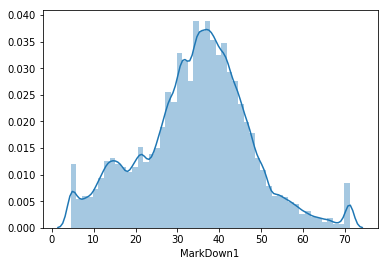

In [89]:
sns.distplot((data_m1_notna.MarkDown1))

C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


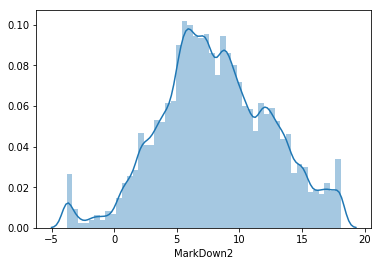

In [90]:
sns.distplot((data_m2_notna.MarkDown2))

C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


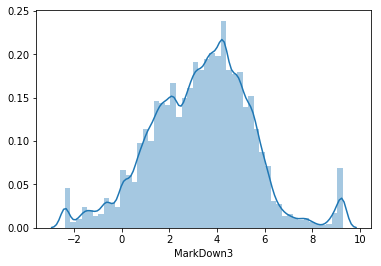

In [91]:
sns.distplot((data_m3_notna.MarkDown3))

C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


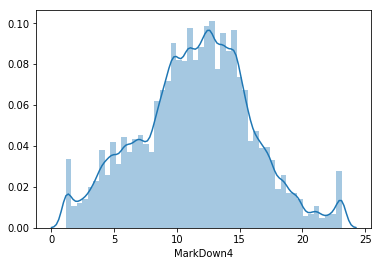

In [92]:
sns.distplot((data_m4_notna.MarkDown4))

C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


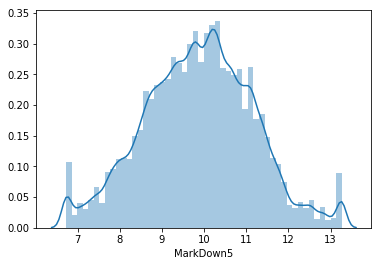

In [93]:
sns.distplot((data_m5_notna.MarkDown5))

In [94]:
#Splitting the Columns
feature_columns_m1 = data_m1_notna.columns.difference( ['MarkDown1','train/test'] )
feature_columns_m2 = data_m2_notna.columns.difference( ['MarkDown2','train/test'] )
feature_columns_m3 = data_m3_notna.columns.difference( ['MarkDown3','train/test'] )
feature_columns_m4 = data_m4_notna.columns.difference( ['MarkDown4','train/test'] )
feature_columns_m5 = data_m5_notna.columns.difference( ['MarkDown5','train/test'] )

In [95]:
from sklearn.cross_validation import train_test_split

C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [96]:
# Splitting the Data 
train_X_m1, test_X_m1, train_y_m1, test_y_m1 = train_test_split( data_m1_notna[feature_columns_m1],
                                                  data_m1_notna['MarkDown1'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

train_X_m2, test_X_m2, train_y_m2, test_y_m2 = train_test_split( data_m2_notna[feature_columns_m2],
                                                  data_m2_notna['MarkDown2'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

train_X_m3, test_X_m3, train_y_m3, test_y_m3 = train_test_split( data_m3_notna[feature_columns_m3],
                                                  data_m3_notna['MarkDown3'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

train_X_m4, test_X_m4, train_y_m4, test_y_m4 = train_test_split( data_m4_notna[feature_columns_m4],
                                                  data_m4_notna['MarkDown4'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

train_X_m5, test_X_m5, train_y_m5, test_y_m5 = train_test_split( data_m5_notna[feature_columns_m5],
                                                  data_m5_notna['MarkDown5'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
radm_clf_f1 = RandomForestRegressor(oob_score=True,n_estimators=200,)
radm_clf_f1.fit( train_X_m1, train_y_m1 )

radm_clf_f2 = RandomForestRegressor(oob_score=True,n_estimators=200,)
radm_clf_f2.fit( train_X_m2, train_y_m2 )

radm_clf_f3 = RandomForestRegressor(oob_score=True,n_estimators=200,)
radm_clf_f3.fit( train_X_m3, train_y_m3 )

radm_clf_f4 = RandomForestRegressor(oob_score=True,n_estimators=200,)
radm_clf_f4.fit( train_X_m4, train_y_m4 )

radm_clf_f5 = RandomForestRegressor(oob_score=True,n_estimators=200,)
radm_clf_f5.fit( train_X_m5, train_y_m5 )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=3,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [100]:
# Prediting with Random Forest 
radm_test_pred_f1 = pd.DataFrame( { 'actual':  test_y_m1,'predicted': radm_clf_f1.predict( test_X_m1 ) } )

radm_test_pred_f2 = pd.DataFrame( { 'actual':  test_y_m2,'predicted': radm_clf_f2.predict( test_X_m2 ) } )

radm_test_pred_f3 = pd.DataFrame( { 'actual':  test_y_m3,'predicted': radm_clf_f3.predict( test_X_m3 ) } )

radm_test_pred_f4 = pd.DataFrame( { 'actual':  test_y_m4,'predicted': radm_clf_f4.predict( test_X_m4 ) } )

radm_test_pred_f5 = pd.DataFrame( { 'actual':  test_y_m5,'predicted': radm_clf_f5.predict( test_X_m5 ) } )

In [101]:
from sklearn import metrics

In [102]:
# Predicting on Training Data with the  Model 
rmse_t1 = np.sqrt( metrics.mean_squared_error( test_y_m1, radm_test_pred_f1.predicted) )
print (rmse_t1)
print (metrics.r2_score( test_y_m1, radm_test_pred_f1.predicted))
print()
rmse_t2 = np.sqrt( metrics.mean_squared_error( test_y_m2, radm_test_pred_f2.predicted) )
print (rmse_t2)
print (metrics.r2_score( test_y_m2, radm_test_pred_f2.predicted))
print()
rmse_t3 = np.sqrt( metrics.mean_squared_error( test_y_m3, radm_test_pred_f3.predicted) )
print (rmse_t3)
print (metrics.r2_score( test_y_m3, radm_test_pred_f3.predicted))
print()
rmse_t4 = np.sqrt( metrics.mean_squared_error( test_y_m4, radm_test_pred_f4.predicted) )
print (rmse_t4)
print (metrics.r2_score( test_y_m4, radm_test_pred_f4.predicted))
print()
rmse_t5 = np.sqrt( metrics.mean_squared_error( test_y_m5, radm_test_pred_f5.predicted) )
print (rmse_t5)
print (metrics.r2_score( test_y_m5, radm_test_pred_f5.predicted))

1.2116250244054388e-06
0.9999999999999913

2.4397886582625684e-06
0.9999999999996981

0.0146336773306343
0.9999522870006211

2.984645161016103e-06
0.9999999999995567

8.694317753550479e-06
0.999999999955376


In [103]:
# Dropping MarkDown values because they are NaN Values
data_m1_na.drop('MarkDown1',axis=1,inplace=True)
data_m2_na.drop('MarkDown2',axis=1,inplace=True)
data_m3_na.drop('MarkDown3',axis=1,inplace=True)
data_m4_na.drop('MarkDown4',axis=1,inplace=True)
data_m5_na.drop('MarkDown5',axis=1,inplace=True)

In [104]:
# Concatenating predicted Markdown values with Dataframes 
data_m1_na=pd.concat([data_m1_na,pd.DataFrame( { 'MarkDown1': radm_clf_f1.predict( data_m1_na.drop('train/test',axis=1) ) } )],axis=1)
data_m2_na=pd.concat([data_m2_na,pd.DataFrame( { 'MarkDown2': radm_clf_f2.predict( data_m2_na.drop('train/test',axis=1) ) } )],axis=1)
data_m3_na=pd.concat([data_m3_na,pd.DataFrame( { 'MarkDown3': radm_clf_f3.predict( data_m3_na.drop('train/test',axis=1) ) } )],axis=1)
data_m4_na=pd.concat([data_m4_na,pd.DataFrame( { 'MarkDown4': radm_clf_f4.predict( data_m4_na.drop('train/test',axis=1) ) } )],axis=1)
data_m5_na=pd.concat([data_m5_na,pd.DataFrame( { 'MarkDown5': radm_clf_f5.predict( data_m5_na.drop('train/test',axis=1) ) } )],axis=1)


In [105]:
# Separating data of original testing and training based on the column 'train/test'
data_m1_na_train=data_m1_na[data_m1_na['train/test'].str.contains('train')]
data_m1_na_test=data_m1_na[data_m1_na['train/test'].str.contains('test')]

data_m2_na_train=data_m2_na[data_m2_na['train/test'].str.contains('train')]
data_m2_na_test=data_m2_na[data_m2_na['train/test'].str.contains('test')]

data_m3_na_train=data_m3_na[data_m3_na['train/test'].str.contains('train')]
data_m3_na_test=data_m3_na[data_m3_na['train/test'].str.contains('test')]

data_m4_na_train=data_m4_na[data_m4_na['train/test'].str.contains('train')]
data_m4_na_test=data_m4_na[data_m4_na['train/test'].str.contains('test')]

data_m5_na_train=data_m5_na[data_m5_na['train/test'].str.contains('train')]
data_m5_na_test=data_m5_na[data_m5_na['train/test'].str.contains('test')]

In [106]:
# Stacking predicted and original values of Markdown of training data 
data_m1_na_train=data_m1_na_train[['train/test','MarkDown1']]
data_m1_na_train.set_index('train/test',inplace=True)
m1=data_train[['MarkDown1','train/test']]
m1.set_index('train/test',inplace=True)
m1.dropna(inplace=True)
m1=pd.concat([m1,data_m1_na_train],axis=0)

data_m2_na_train=data_m2_na_train[['train/test','MarkDown2']]
data_m2_na_train.set_index('train/test',inplace=True)
m2=data_train[['MarkDown2','train/test']]
m2.set_index('train/test',inplace=True)
m2.dropna(inplace=True)
m2=pd.concat([m2,data_m2_na_train],axis=0)

data_m3_na_train=data_m3_na_train[['train/test','MarkDown3']]
data_m3_na_train.set_index('train/test',inplace=True)
m3=data_train[['MarkDown3','train/test']]
m3.set_index('train/test',inplace=True)
m3.dropna(inplace=True)
m3=pd.concat([m3,data_m3_na_train],axis=0)

data_m4_na_train=data_m4_na_train[['train/test','MarkDown4']]
data_m4_na_train.set_index('train/test',inplace=True)
m4=data_train[['MarkDown4','train/test']]
m4.set_index('train/test',inplace=True)
m4.dropna(inplace=True)
m4=pd.concat([m4,data_m4_na_train],axis=0)

data_m5_na_train=data_m5_na_train[['train/test','MarkDown5']]
data_m5_na_train.set_index('train/test',inplace=True)
m5=data_train[['MarkDown5','train/test']]
m5.set_index('train/test',inplace=True)
m5.dropna(inplace=True)
m5=pd.concat([m5,data_m5_na_train],axis=0)

In [107]:
print(len(m1))
print(len(m2))
print(len(m3))
print(len(m4))
print(len(m5))

421570
421570
421570
421570
421570


In [108]:
# Dropping original values of MarkDown and concatenating the new Mardown Columns formed by predicted and original values 
data_train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)
data_train.set_index('train/test',inplace=True)
data_train=pd.concat([data_train,m1,m2,m3,m4,m5],axis=1, join='inner')

In [109]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, train0 to train421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null object
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [110]:
# Stacking predicted and original values of Markdown of testing Data  data 
data_m1_na_test=data_m1_na_test[['train/test','MarkDown1']]
data_m1_na_test.set_index('train/test',inplace=True)
m11=data_test[['MarkDown1','train/test']]
m11.set_index('train/test',inplace=True)
m11.dropna(inplace=True)
m11=pd.concat([m11,data_m1_na_test],axis=0)

data_m2_na_test=data_m2_na_test[['train/test','MarkDown2']]
data_m2_na_test.set_index('train/test',inplace=True)
m22=data_test[['MarkDown2','train/test']]
m22.set_index('train/test',inplace=True)
m22.dropna(inplace=True)
m22=pd.concat([m22,data_m2_na_test],axis=0)

data_m3_na_test=data_m3_na_test[['train/test','MarkDown3']]
data_m3_na_test.set_index('train/test',inplace=True)
m33=data_test[['MarkDown3','train/test']]
m33.set_index('train/test',inplace=True)
m33.dropna(inplace=True)
m33=pd.concat([m33,data_m3_na_test],axis=0)

data_m4_na_test=data_m4_na_test[['train/test','MarkDown4']]
data_m4_na_test.set_index('train/test',inplace=True)
m44=data_test[['MarkDown4','train/test']]
m44.set_index('train/test',inplace=True)
m44.dropna(inplace=True)
m44=pd.concat([m44,data_m4_na_test],axis=0)

data_m5_na_test=data_m5_na_test[['train/test','MarkDown5']]
data_m5_na_test.set_index('train/test',inplace=True)
m55=data_test[['MarkDown5','train/test']]
m55.set_index('train/test',inplace=True)
m55.dropna(inplace=True)
m55=pd.concat([m55,data_m5_na_test],axis=0)

In [111]:
# Dropping original values of MarkDown and concatenating the new Mardown Columns formed by predicted and original values 
data_test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)
data_test.set_index('train/test',inplace=True)
data_test=pd.concat([data_test,m11,m22,m33,m44,m55],axis=1, join='inner')

In [112]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115064 entries, test0 to test115063
Data columns (total 15 columns):
Store           115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Dept            115064 non-null int64
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
MarkDown1       115064 non-null float64
MarkDown2       115064 non-null float64
MarkDown3       115064 non-null float64
MarkDown4       115064 non-null float64
MarkDown5       115064 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [113]:
# Saving the thus formed traing and testing Data 
data_train.to_csv('data_train_updated.csv')
data_test.to_csv('data_test_updated.csv')

In [132]:
# Reading training and testing data once again the one which we created 
data_train=pd.read_csv('data_train_updated.csv')
data_test=pd.read_csv('data_test_updated.csv')

In [133]:
data_train.head()

,train/test,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,train0,10,2010-02-05,False,1,40212.84,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904
1,train1,10,2010-02-05,False,98,74.00,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904
2,train2,10,2010-02-05,False,32,26116.73,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904
3,train3,10,2010-02-05,False,25,20779.50,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904
4,train4,10,2010-02-05,False,34,50585.42,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904


In [134]:
data_test.head()

,train/test,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,test0,10,2012-11-02,False,1,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05
1,test1,10,2012-11-02,False,72,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05
2,test2,10,2012-11-02,False,71,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05
3,test3,10,2012-11-02,False,21,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05
4,test4,10,2012-11-02,False,67,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05


In [135]:
# Use this code when importing Data from csv again otherwise use next code i.e. resetting index
# data_train.drop('train/test',axis=1,inplace=True)
# data_test.drop('train/test',axis=1,inplace=True)

In [119]:
# Dropping Variable because it is not needed afterwards
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)

In [136]:
data_train.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,10,2010-02-05,False,1,40212.84,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904
1,10,2010-02-05,False,98,74.00,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904
2,10,2010-02-05,False,32,26116.73,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904
3,10,2010-02-05,False,25,20779.50,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904
4,10,2010-02-05,False,34,50585.42,B,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,9.46904


In [137]:
data_test.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,10,2012-11-02,False,1,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05
1,10,2012-11-02,False,72,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05
2,10,2012-11-02,False,71,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05
3,10,2012-11-02,False,21,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05
4,10,2012-11-02,False,67,B,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05


In [138]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null object
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [139]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Dept            115064 non-null int64
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
MarkDown1       115064 non-null float64
MarkDown2       115064 non-null float64
MarkDown3       115064 non-null float64
MarkDown4       115064 non-null float64
MarkDown5       115064 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


In [140]:
data_train.Weekly_Sales=outlier_capping(data_train.Weekly_Sales)

In [141]:
data_test.CPI=data_test.CPI.fillna(data_test.CPI.median())
data_test.Unemployment=data_test.Unemployment.fillna(data_test.Unemployment.median())

In [142]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Dept            115064 non-null int64
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
CPI             115064 non-null float64
Unemployment    115064 non-null float64
MarkDown1       115064 non-null float64
MarkDown2       115064 non-null float64
MarkDown3       115064 non-null float64
MarkDown4       115064 non-null float64
MarkDown5       115064 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


In [ ]:
# Building series/DataFrame  with lags values of y-variable assuming that sales of present period is dependent on later Period
# Weekly_Sales_1=data_train.Weekly_Sales.shift(-1)
# Weekly_Sales_2=data_train.Weekly_Sales.shift(-2)
# week = pd.DataFrame({'Weekly_Sales_1':Weekly_Sales_1, 'Weekly_Sales_2':Weekly_Sales_2})
# Concatenating Lagged values of y-with original Dataframe 
# data_train=pd.concat([data_train,week],axis=1)
# Dropping rows with NaN values i.e. ones created by using lagged value of Weekly_Sales 
# data_train.dropna(axis=0,inplace=True)
# Continuous Variable for Transformation 
# cont_var=['Temperature','Size','Fuel_Price','CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales_1','Weekly_Sales_2']

In [143]:
# Continuous Variable for Transformation 
cont_var=['Temperature','Size','Fuel_Price','CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

In [144]:
# Subsetting DataFrame containing Continuous Variable 
data_train_cont=data_train[cont_var]
data_test_cont=data_test[cont_var]

In [145]:
# transformations = X, X_squared, X_sqrt, X_ln 
squared = (data_train_cont**2).add_suffix("_squared")
square_root = (data_train_cont**0.5).add_suffix("_sqrt")
natural_log = np.log(data_train_cont+1).add_suffix("_ln")
data_train_1= pd.concat([data_train_cont, squared, square_root,natural_log], axis=1)
data_train= pd.concat([data_train, squared, square_root,natural_log], axis=1)

# Transformations on testing data 
squared = (data_test_cont**2).add_suffix("_squared")
square_root = (data_test_cont**0.5).add_suffix("_sqrt")
natural_log = np.log(data_test_cont+1).add_suffix("_ln")
data_test_1= pd.concat([data_test_cont, squared, square_root,natural_log], axis=1)
data_test= pd.concat([data_test, squared, square_root,natural_log], axis=1)

C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [146]:
sele_frame=pd.DataFrame(columns=['features','correlation'])
var_sel=[]
for var in cont_var:
    filter_col = [col for col in data_train_1 if col.startswith(var)]
    sele_frame.features=filter_col
    for var in range(0,len(sele_frame)):
        sele_frame.correlation[var]=abs(data_train['Weekly_Sales'].corr(data_train_1[sele_frame.features[var]]))
    sele_frame.sort_values('correlation',ascending=False,inplace=True)
    var_sel.append(sele_frame.features[0])        

In [147]:
var_sel

['Temperature',
 'Size_ln',
 'Fuel_Price_ln',
 'CPI',
 'Unemployment_squared',
 'MarkDown1',
 'MarkDown2_squared',
 'MarkDown3_ln',
 'MarkDown4_ln',
 'MarkDown5_sqrt']

In [148]:
cont_var=var_sel
# Subsetting DataFrame containing Continuous Variable 
data_train_cont=data_train[cont_var]
data_test_cont=data_test[cont_var]

In [149]:
# Feature Generation by Taking every pair of numerical variable availabe and making variable by adding, subtracting,multiplying and dividing values 
for i in range(0,len(cont_var)):
    for j in range(i+1,len(cont_var)):
        data_train_cont['variableivariablej']= data_train_cont[cont_var[i]]+ data_train_cont[cont_var[j]]
        data_train_cont.rename(columns={'variableivariablej':cont_var[i]+"plus"+cont_var[j]},inplace=True)
        data_train_cont['variableivariablej']= data_train_cont[cont_var[i]]- data_train_cont[cont_var[j]]
        data_train_cont.rename(columns={'variableivariablej':cont_var[i]+"minus"+cont_var[j]},inplace=True)
        data_train_cont['variableivariablej']= data_train_cont[cont_var[i]]* data_train_cont[cont_var[j]]
        data_train_cont.rename(columns={'variableivariablej':cont_var[i]+"multiply"+cont_var[j]},inplace=True)
        data_train_cont['variableivariablej']= data_train_cont[cont_var[i]]/ data_train_cont[cont_var[j]]
        data_train_cont.rename(columns={'variableivariablej':cont_var[i]+"divide"+cont_var[j]},inplace=True)

In [150]:
# Feature Generation by Taking every pair of numerical variable availabe and making variable by adding, subtracting,multiplying and dividing values 
for i in range(0,len(cont_var)):
    for j in range(i+1,len(cont_var)):
        data_test_cont['variableivariablej']= data_test_cont[cont_var[i]]+ data_test_cont[cont_var[j]]
        data_test_cont.rename(columns={'variableivariablej':cont_var[i]+"plus"+cont_var[j]},inplace=True)
        data_test_cont['variableivariablej']= data_test_cont[cont_var[i]]- data_test_cont[cont_var[j]]
        data_test_cont.rename(columns={'variableivariablej':cont_var[i]+"minus"+cont_var[j]},inplace=True)
        data_test_cont['variableivariablej']= data_test_cont[cont_var[i]]* data_test_cont[cont_var[j]]
        data_test_cont.rename(columns={'variableivariablej':cont_var[i]+"multiply"+cont_var[j]},inplace=True)
        data_test_cont['variableivariablej']= data_test_cont[cont_var[i]]/ data_test_cont[cont_var[j]]
        data_test_cont.rename(columns={'variableivariablej':cont_var[i]+"divide"+cont_var[j]},inplace=True)

In [151]:
data_train_cont.drop(cont_var,axis=1,inplace=True)
data_train=pd.concat([data_train,data_train_cont],axis=1)

data_test_cont.drop(cont_var,axis=1,inplace=True)
data_test=pd.concat([data_test,data_test_cont],axis=1)

In [152]:
data_train.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,MarkDown3_lnmultiplyMarkDown4_ln,MarkDown3_lndivideMarkDown4_ln,MarkDown3_lnplusMarkDown5_sqrt,MarkDown3_lnminusMarkDown5_sqrt,MarkDown3_lnmultiplyMarkDown5_sqrt,MarkDown3_lndivideMarkDown5_sqrt,MarkDown4_lnplusMarkDown5_sqrt,MarkDown4_lnminusMarkDown5_sqrt,MarkDown4_lnmultiplyMarkDown5_sqrt,MarkDown4_lndivideMarkDown5_sqrt
0,10,2010-02-05,False,1,40212.84,B,126512,54.34,2.962,126.442065,...,1.670147,0.705388,4.162585,-1.991777,3.339984,0.352727,4.615913,-1.538448,4.734958,0.500046
1,10,2010-02-05,False,98,74.00,B,126512,54.34,2.962,126.442065,...,1.670147,0.705388,4.162585,-1.991777,3.339984,0.352727,4.615913,-1.538448,4.734958,0.500046
2,10,2010-02-05,False,32,26116.73,B,126512,54.34,2.962,126.442065,...,1.670147,0.705388,4.162585,-1.991777,3.339984,0.352727,4.615913,-1.538448,4.734958,0.500046
3,10,2010-02-05,False,25,20779.50,B,126512,54.34,2.962,126.442065,...,1.670147,0.705388,4.162585,-1.991777,3.339984,0.352727,4.615913,-1.538448,4.734958,0.500046
4,10,2010-02-05,False,34,50585.42,B,126512,54.34,2.962,126.442065,...,1.670147,0.705388,4.162585,-1.991777,3.339984,0.352727,4.615913,-1.538448,4.734958,0.500046


In [153]:
data_test.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,...,MarkDown3_lnmultiplyMarkDown4_ln,MarkDown3_lndivideMarkDown4_ln,MarkDown3_lnplusMarkDown5_sqrt,MarkDown3_lnminusMarkDown5_sqrt,MarkDown3_lnmultiplyMarkDown5_sqrt,MarkDown3_lndivideMarkDown5_sqrt,MarkDown4_lnplusMarkDown5_sqrt,MarkDown4_lnminusMarkDown5_sqrt,MarkDown4_lnmultiplyMarkDown5_sqrt,MarkDown4_lndivideMarkDown5_sqrt
0,10,2012-11-02,False,1,B,126512,70.79,4.099,131.236226,6.943,...,37.318418,0.391364,68.806659,-61.163338,248.350605,0.058808,74.749973,-55.220024,634.576859,0.150265
1,10,2012-11-02,False,72,B,126512,70.79,4.099,131.236226,6.943,...,37.318418,0.391364,68.806659,-61.163338,248.350605,0.058808,74.749973,-55.220024,634.576859,0.150265
2,10,2012-11-02,False,71,B,126512,70.79,4.099,131.236226,6.943,...,37.318418,0.391364,68.806659,-61.163338,248.350605,0.058808,74.749973,-55.220024,634.576859,0.150265
3,10,2012-11-02,False,21,B,126512,70.79,4.099,131.236226,6.943,...,37.318418,0.391364,68.806659,-61.163338,248.350605,0.058808,74.749973,-55.220024,634.576859,0.150265
4,10,2012-11-02,False,67,B,126512,70.79,4.099,131.236226,6.943,...,37.318418,0.391364,68.806659,-61.163338,248.350605,0.058808,74.749973,-55.220024,634.576859,0.150265


In [154]:
# Separting categorical values for Dummy and crearting Dummy 
dummy=['Store', 'IsHoliday', 'Dept', 'Type']
for var in dummy:
    data_train=create_dummies(data_train,var)
    data_test=create_dummies(data_test,var)

In [155]:
# Extracting year, month and Date from 'Date' variable 
data_train.Date=data_train.Date.astype('datetime64[ns]')
datedata(data_train,'Date')

# Extracting year, month and Date from 'Date' variable 
data_test.Date=data_test.Date.astype('datetime64[ns]')
datedata(data_test,'Date')

,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C,Date_year,Date_month,Date_day
0,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
1,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
2,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
3,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
4,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
5,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
6,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
7,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
8,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2
9,126512,70.79,4.099,131.236226,6.943,25680.20,6037.06,44.680000,17412.04,4223.05,...,0,0,0,0,0,1,0,2012,11,2


In [156]:
# Replace inf values with NaN to fill them with Median --> Training data 
data_train.replace([np.inf, -np.inf], np.nan,inplace=True)

# Checking for Infinite columns 
fin=np.isinf(data_test).sum()
fin1=fin[fin.values>0]
print(fin1)
print()

# Checking for Missing Rows  
miss=data_train.isna().sum()
miss1=miss[miss.values>0]
print(miss1)
print()

# Filling missing Column with Median 
for var in miss1.index:
    data_train[miss1.index]=data_train[miss1.index].fillna(data_train[miss1.index].median())


Series([], dtype: int64)

Temperature_sqrt                                 69
MarkDown2_sqrt                                 1311
MarkDown3_sqrt                                  257
Temperature_ln                                   69
MarkDown2_ln                                   1101
MarkDown3_ln                                    142
TemperaturedivideMarkDown2_squared              207
TemperatureplusMarkDown3_ln                     142
TemperatureminusMarkDown3_ln                    142
TemperaturemultiplyMarkDown3_ln                 142
TemperaturedivideMarkDown3_ln                   139
Size_lndivideMarkDown2_squared                  207
Size_lnplusMarkDown3_ln                         142
Size_lnminusMarkDown3_ln                        142
Size_lnmultiplyMarkDown3_ln                     142
Size_lndivideMarkDown3_ln                       139
Fuel_Price_lndivideMarkDown2_squared            207
Fuel_Price_lnplusMarkDown3_ln                   142
Fuel_Price_lnminusMarkDown3_ln        

In [157]:
# Replace inf values with NaN to fill them with Median --->>> Testing Data 
data_test.replace([np.inf, -np.inf], np.nan,inplace=True)

# Checking for Infinite columns 
fin=np.isinf(data_test).sum()
fin1=fin[fin.values>0]
print(fin1)
print()

# Checking for Missing Rows  
miss=data_test.isna().sum()
miss1=miss[miss.values>0]
print(miss1)
print()

# Filling missing Column with Median 
for var in miss1.index:
    data_test[miss1.index]=data_test[miss1.index].fillna(data_test[miss1.index].median())

Series([], dtype: int64)

Temperature_sqrt                              208
MarkDown1_sqrt                                207
MarkDown2_sqrt                                412
MarkDown3_sqrt                                589
MarkDown5_sqrt                                136
Temperature_ln                                208
MarkDown1_ln                                  207
MarkDown2_ln                                  268
MarkDown3_ln                                  466
MarkDown5_ln                                  136
TemperatureplusMarkDown3_ln                   466
TemperatureminusMarkDown3_ln                  466
TemperaturemultiplyMarkDown3_ln               466
TemperaturedivideMarkDown3_ln                 466
TemperatureplusMarkDown5_sqrt                 136
TemperatureminusMarkDown5_sqrt                136
TemperaturemultiplyMarkDown5_sqrt             136
TemperaturedivideMarkDown5_sqrt               136
Size_lnplusMarkDown3_ln                       466
Size_lnminusMarkDown3_ln

In [158]:
#Splitting the Columns for Modelling
feature_columns = data_train.columns.difference( ['Weekly_Sales'] )
print(feature_columns)

Index(['CPI', 'CPI_ln', 'CPI_sqrt', 'CPI_squared', 'CPIdivideMarkDown1',
       'CPIdivideMarkDown2_squared', 'CPIdivideMarkDown3_ln',
       'CPIdivideMarkDown4_ln', 'CPIdivideMarkDown5_sqrt',
       'CPIdivideUnemployment_squared',
       ...
       'Unemployment_squaredmultiplyMarkDown1',
       'Unemployment_squaredmultiplyMarkDown2_squared',
       'Unemployment_squaredmultiplyMarkDown3_ln',
       'Unemployment_squaredmultiplyMarkDown4_ln',
       'Unemployment_squaredmultiplyMarkDown5_sqrt',
       'Unemployment_squaredplusMarkDown1',
       'Unemployment_squaredplusMarkDown2_squared',
       'Unemployment_squaredplusMarkDown3_ln',
       'Unemployment_squaredplusMarkDown4_ln',
       'Unemployment_squaredplusMarkDown5_sqrt'],
      dtype='object', length=350)


In [159]:
# Splitting the Data 
train_X, test_X, train_y, test_y = train_test_split(data_train[feature_columns],
                                                  data_train['Weekly_Sales'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [1]:
from xgboost import XGBRegressor

In [161]:
# fit model no training data
model = XGBRegressor(n_jobs=3,max_depth=9,n_estimators=180)
model.fit(train_X,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=180,
       n_jobs=3, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [2]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 100 }
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

NameError: name 'GridSearchCV' is not defined

In [ ]:
optimized_GBM.fit(final_train, y_train)

In [162]:
# Prediting with Random Forest 
radm_test_pred = pd.DataFrame( { 'actual':  test_y,'predicted': model.predict( test_X ) } )

In [163]:
# Predicting on Testing Data with the  Model 
rmse_t = np.sqrt( metrics.mean_squared_error( test_y, radm_test_pred.predicted) )
print (rmse_t)
print (metrics.r2_score( test_y, radm_test_pred.predicted))
print()

5045.602863550328
0.9403444340930449



In [164]:
# Prediting with Random Forest 
radm_test = pd.DataFrame( { 'actual':  train_y,'predicted': model.predict( train_X ) } )

In [165]:
# Predicting on Training Data with the  Model 
rmse = np.sqrt( metrics.mean_squared_error( train_y, radm_test.predicted) )
print (rmse_t)
print (metrics.r2_score( train_y, radm_test.predicted))
print()

5045.602863550328
0.9489452246169542



In [177]:
# Sorting the columns in Alphabetical order and Predicting for Testing Data and concatenating it with original testing dataFrame
data_test['Pred_Weekly_Sales']=model.predict(data_test.reindex_axis(sorted(data_test.columns), axis=1))

C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [178]:
data_test.head()

,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C,Date_year,Date_month,Date_day,Pred_Weekly_Sales
0,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05,...,0,0,0,0,1,0,2012,11,2,19010.041016
1,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05,...,0,0,0,0,1,0,2012,11,2,97527.421875
2,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05,...,0,0,0,0,1,0,2012,11,2,16898.863281
3,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05,...,0,0,0,0,1,0,2012,11,2,12118.195312
4,126512,70.79,4.099,131.236226,6.943,25680.2,6037.06,44.68,17412.04,4223.05,...,0,0,0,0,1,0,2012,11,2,15836.833984


In [179]:
data_train.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C,Date_year,Date_month,Date_day
0,40212.84,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,...,0,0,0,0,0,1,0,2010,2,5
1,74.00,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,...,0,0,0,1,0,1,0,2010,2,5
2,26116.73,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,...,0,0,0,0,0,1,0,2010,2,5
3,20779.50,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,...,0,0,0,0,0,1,0,2010,2,5
4,50585.42,126512,54.34,2.962,126.442065,9.765,26.961408,1.368201,1.960636,3.658683,...,0,0,0,0,0,1,0,2010,2,5
